In [3]:
%matplotlib inline
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
import numpy as np

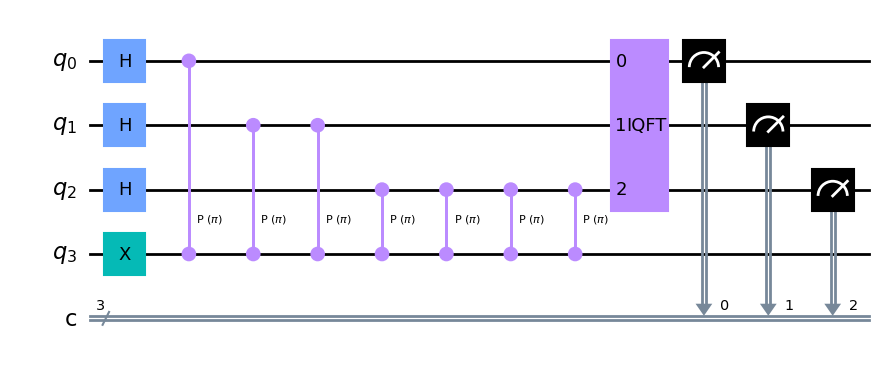

In [17]:
total_counting_qubits = 3
total_qubits = total_counting_qubits+1

qc = QuantumCircuit(total_qubits, total_counting_qubits)
qc.x(-1)
qc.h(range(total_counting_qubits))

theta = np.pi #z gate

repetitions = 1
for qubit in range(total_counting_qubits):
    for _ in range(repetitions):
        qc.cp(theta, qubit, -1)
    repetitions *= 2

qc.append(QFT(total_counting_qubits, inverse=True), range(total_counting_qubits))
qc.measure(range(total_counting_qubits), range(total_counting_qubits))
qc.draw('mpl')

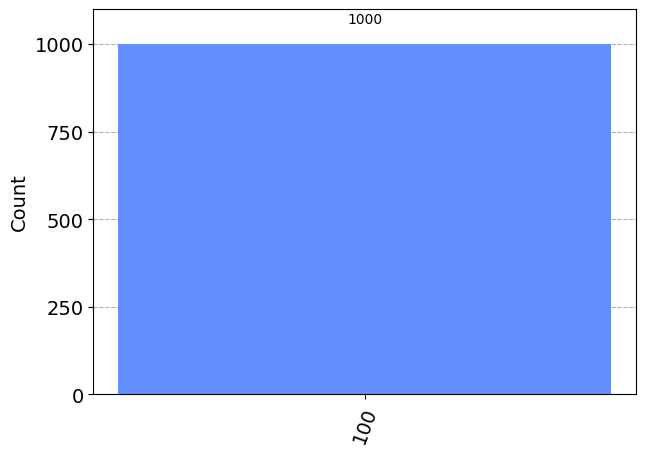

In [16]:
sim = AerSimulator()
job = sim.run(transpile(qc, sim), shots=1000).result().get_counts()
plot_histogram(job)

${4 \over 2^3} = {4 \over 8} = {1 \over 2}$\
$2\pi i \theta = 2\pi i {1\over2} = \pi i$